# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train dataset

In [2]:
data_tr=pd.read_excel('Final_Train.xlsx')

In [3]:
data_tr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Importing the test dataset

In [4]:
data_te=pd.read_excel('Final_Test.xlsx')

In [5]:
data_te.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# Merging the Train and Test dataset

In [6]:
data=pd.concat([data_tr,data_te],axis=0,sort=False)

In [7]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [8]:
data.shape

(7948, 7)

# Null Value Analysis

In [9]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

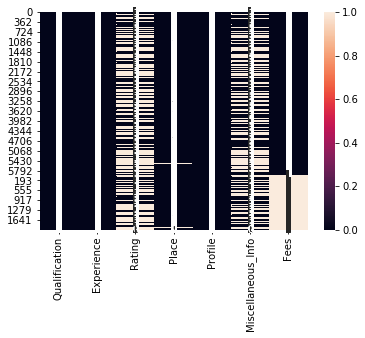

In [10]:
sns.heatmap(data.isnull(),annot=True)

# Treating the Null/Missing Values

In [11]:
data['Rating'].fillna(data['Rating'].mode().values[0],inplace=True)
data['Place'].fillna(data['Place'].mode().values[0],inplace=True)
data['Miscellaneous_Info'].fillna(data['Miscellaneous_Info'].mode().values[0],inplace=True)
data['Fees'].fillna(data['Fees'].mean(),inplace=True)


In [12]:
data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

# Count analysis of the categorical features

In [13]:
data['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
19 years experience    343
14 years experience    332
7 years experience     329
13 years experience    325
6 years experience     280
15 years experience    257
18 years experience    254
17 years experience    251
5 years experience     238
16 years experience    237
20 years experience    204
21 years experience    202
22 years experience    184
23 years experience    168
4 years experience     159
3 years experience     144
24 years experience    131
0 years experience     118
25 years experience    115
29 years experience    113
27 years experience    111
28 years experience    111
26 years experience    103
34 years experience     94
30 years experience     86
                      ... 
36 years experience     73
33 years experience     73
39 years experience     70
37 years experience     69
35 years experience     65
40 years experience     61
4

In [15]:
data['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [16]:
#Dropping Miscellaneous_Info
data.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [17]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250.0


>Repacing  % with *1 

In [18]:
data['Rating']=data['Rating'].str.replace("%",'*1').apply(eval)

# Converting the rating to 0 and 1

>If the rating is less than or equal to 80 , it should be mapped to zero else 1

In [19]:
def partition(x):
    if x <=80:
        return 0
    return 1

In [20]:
actualRating=data['Rating']
ZeroOne=actualRating.map(partition)
data['Rating']=ZeroOne

# Data Visualisation using BoxPlots

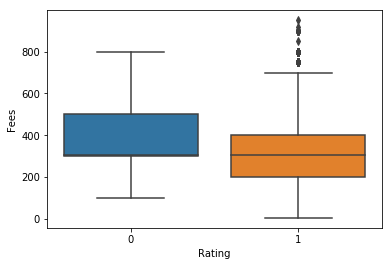

In [21]:
sns.boxplot(x='Rating',y='Fees',data=data)

# Converting Experience Feature into Numeric

In [22]:
data['Experience']=data['Experience'].str.replace("years experience",'*1').apply(eval)

In [23]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,1,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12,1,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9,1,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12,1,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,250.0


In [24]:
def partition(x):
    if x <=10:
        return 1
    if x > 10 and x <= 20:
        return 2
    if x >20:
        return 3
           
        

In [25]:
actualRating=data['Experience']
ZeroOne=actualRating.map(partition)
data['Experience']=ZeroOne

>If the experience is less than 10 it is mapped to 1

>If the experience is in between 10 and 20 its is mapped to 2 and

>mapped to 3 in other case

In [26]:
data.head(5)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",3,1,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",2,1,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",1,1,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",2,1,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,2,1,"Keelkattalai, Chennai",Ayurveda,250.0


# BoxPlot on Experience

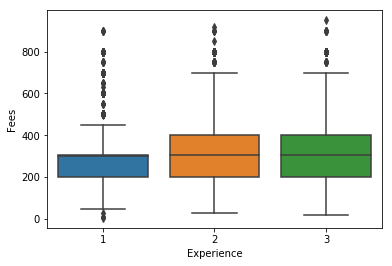

In [27]:
sns.boxplot(x='Experience',y='Fees',data=data)

High experienced doctors are having high fees as per the above BoxPlots

In [28]:
data['Experience'].value_counts()

2    2935
1    2551
3    2462
Name: Experience, dtype: int64

# Encoding the categorical features using LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
list1=['Qualification','Place','Profile']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [34]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,491,3,1,327,5,100.0
1,92,2,1,936,0,350.0
2,1442,1,1,499,3,300.0
3,572,2,1,74,0,250.0
4,16,2,1,369,0,250.0


# Data Visualisation using Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A69C8F66D8>,
      dtype=object)

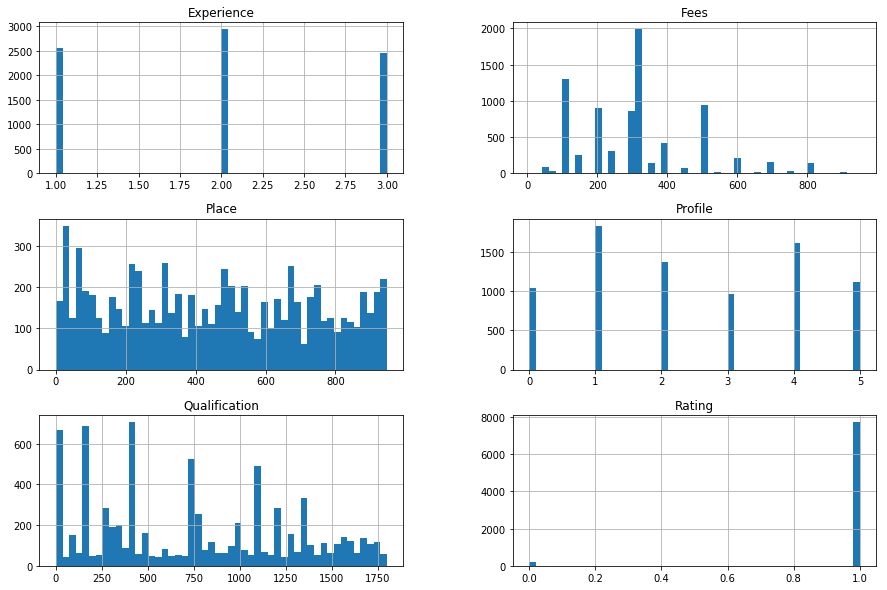

In [35]:
data.hist(bins=50,figsize=(15,10))

# Checking for the outliers

Box Plots for the Attributes


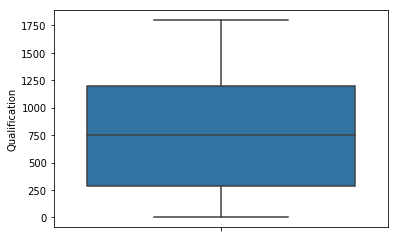

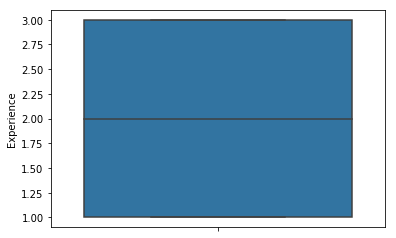

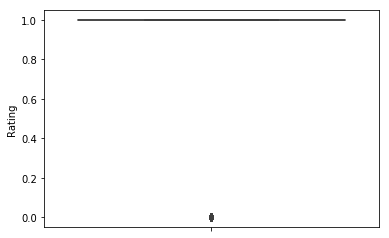

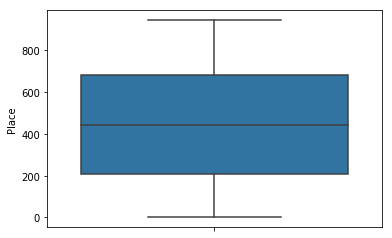

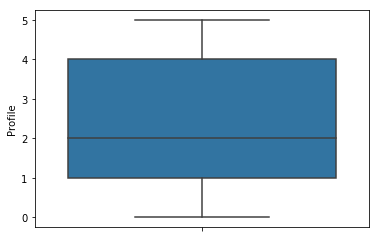

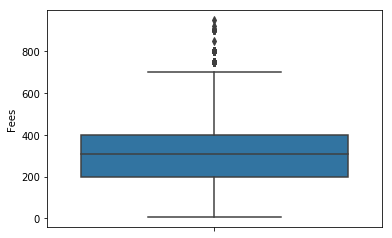

In [36]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
print("Box Plots for the Attributes")
for val in columns:
    sns.boxplot(y=val,data=data)
    plt.show()

>From the above boxplot we can see that Fees is having some outliers which will be treated in the Handling Outliers section

# Data Visualisation using Regression Plots

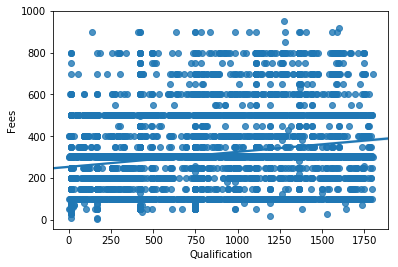

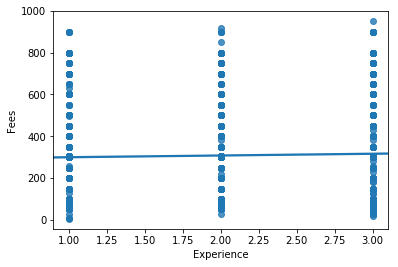

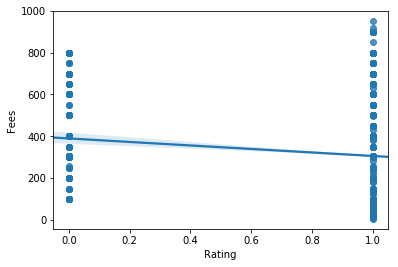

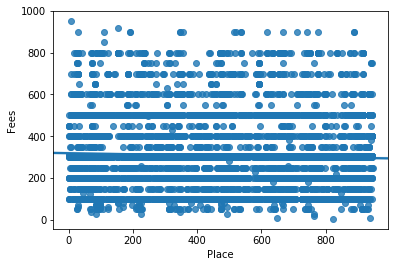

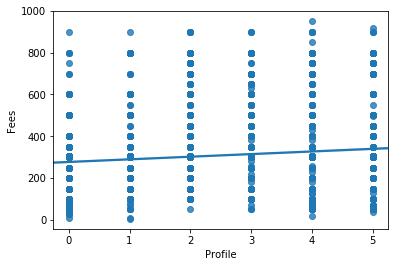

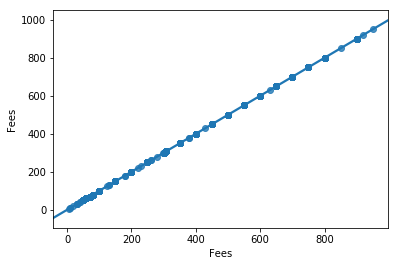

In [37]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
attr=list(data.columns)
for val in attr:
    sns.regplot(x=val,y='Fees',data=data)
    plt.show()

Fees is directly dependent on qualification as highly qualified doctors are having high fees and viceversa

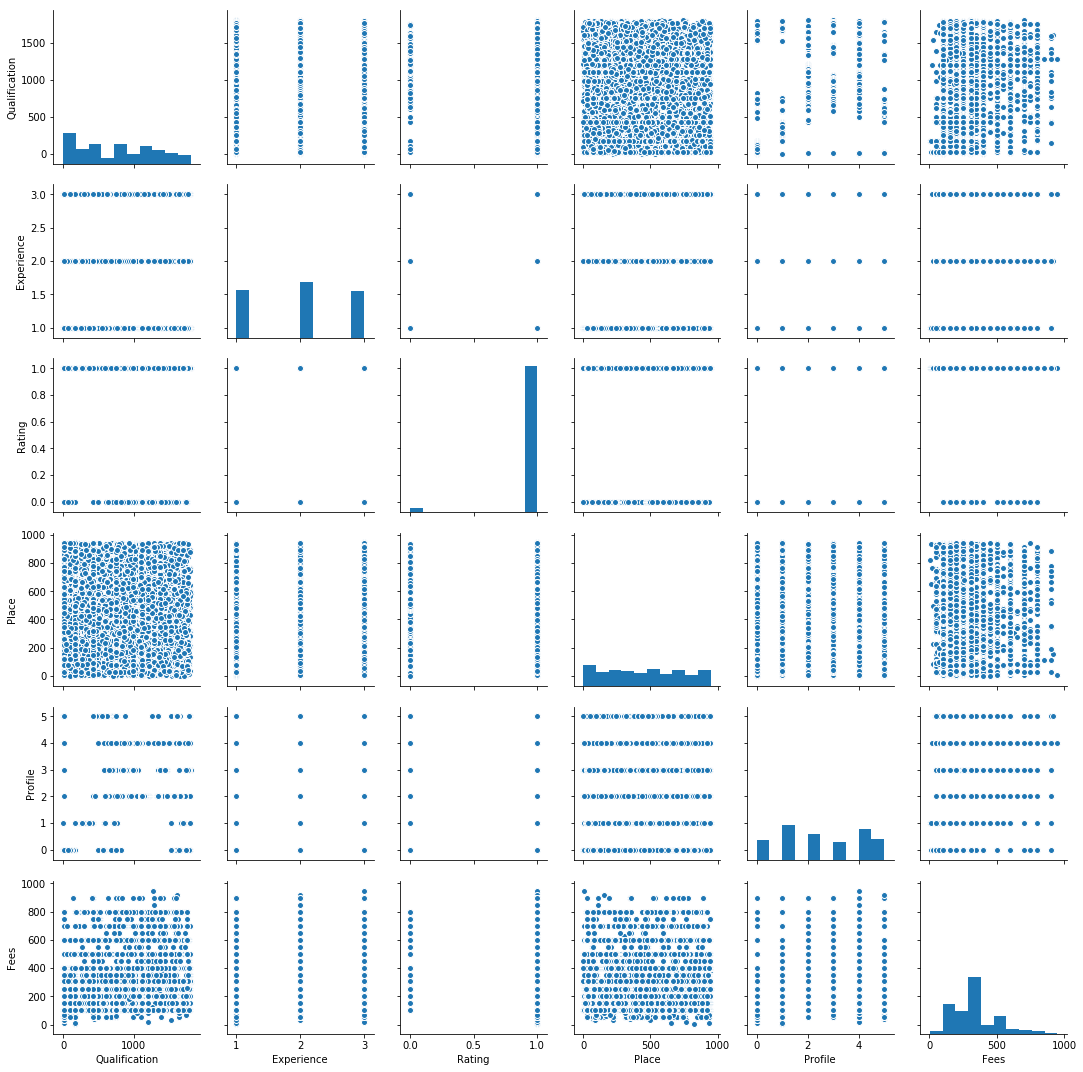

In [38]:
sns.pairplot(data)

# Handling Skewness

In [39]:
data.skew()

Qualification    0.247541
Experience       0.019949
Rating          -5.952836
Place            0.108592
Profile          0.088789
Fees             0.868130
dtype: float64

In [40]:
from scipy import stats
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [41]:
data.skew()

Qualification    0.247541
Experience       0.019949
Rating          -5.952836
Place            0.108592
Profile          0.088789
Fees            -0.587309
dtype: float64

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

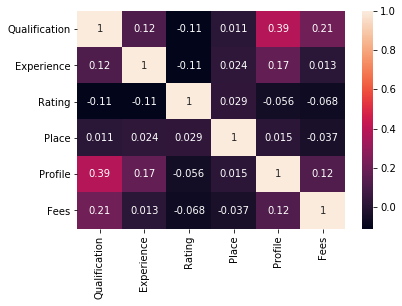

In [42]:
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.8. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [43]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [44]:
data.shape

(7948, 6)

In [45]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,491,3,1,327,5,4.615121
1,92,2,1,936,0,5.860786
2,1442,1,1,499,3,5.707110
3,572,2,1,74,0,5.525453
4,16,2,1,369,0,5.525453


# Handling OutLiers

In [46]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.50416261, 1.27338392, 0.16352593, 0.43574771, 1.53362797,
        1.60774712],
       [1.26316729, 0.01410118, 0.16352593, 1.72602697, 1.4836687 ,
        0.47924808],
       [1.30489368, 1.24518156, 0.16352593, 0.17480278, 0.3267093 ,
        0.22177853],
       ...,
       [1.11847147, 1.24518156, 0.16352593, 0.76050528, 0.93016863,
        0.26542592],
       [1.11859497, 0.01410118, 0.16352593, 1.47581336, 0.88020937,
        0.26542592],
       [0.66953637, 1.24518156, 0.16352593, 0.57946996, 0.27675003,
        0.26542592]])

In [47]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (7948, 6)
shape of the data without  outliers   (7731, 6)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (7731, 6) . Now this will be our finalised Dataset for modelling.

# Scaling the Data

In [48]:
y=df['Fees']
x=df.drop(['Fees'],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [50]:
x=pd.DataFrame(x)

In [51]:
x.head()

,0,1,2,3,4
0,-0.485958,1.294150,0.0,-0.439146,1.531138
1,-1.243468,0.031999,0.0,1.717848,-1.465477
2,1.319538,-1.230152,0.0,0.170054,0.332492
3,-0.332177,0.031999,0.0,-1.335237,-1.465477
4,-1.387756,0.031999,0.0,-0.290388,-1.465477


# Applying Various Regression Models
In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score

2) Root mean sqaure Error

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

In [52]:
#importing the libraries
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [53]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score

In [54]:
from sklearn.model_selection import cross_val_score
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    rmse=cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error').mean()
    print('mean cross_val_score using RMSE as a scoring parameter',rmse)
    return rmse

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [55]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# 1.Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)

The maximum r2 score  is 0.055583742003819214 at random state 74


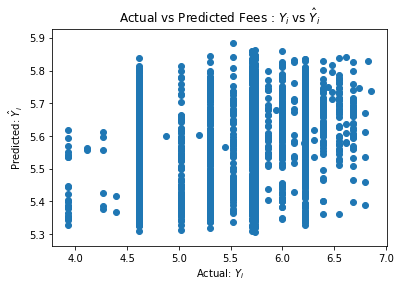

In [131]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=74)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Fees : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [114]:
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score -1.1484796758667067e+31
std deviation of cross_val_score 2.2969593517334134e+31


In [132]:
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using RMSE as a scoring parameter -0.33398235290168565


# 2.KNeighborsRegressor

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 29}

In [135]:
knr=KNeighborsRegressor(n_neighbors=29)
Final_r_state=max_r2_score(knr,x,y)


The maximum r2 score  is 0.10085178369905434 at random state 71


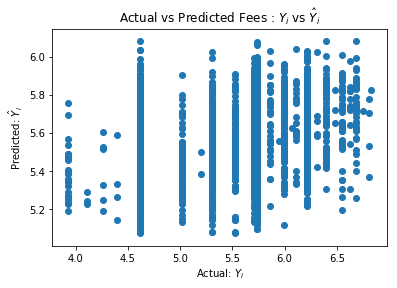

In [146]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=71)
Y_pred = knr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Fees : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [138]:
print('mean cross_val_score using R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

mean cross_val_score using R2 as parameter -2.7044655612022014e+28
std deviation of cross_val_score using  R2 as parameter 5.408931122404403e+28


In [137]:
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using RMSE as a scoring parameter -0.3262686021465015


# 3. DecisionTreeRegressor

In [144]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 1}

In [145]:
DT=DecisionTreeRegressor(max_depth=1)
Final_r_state=max_r2_score(DT,x,y)

The maximum r2 score  is 0.06792387976329872 at random state 65


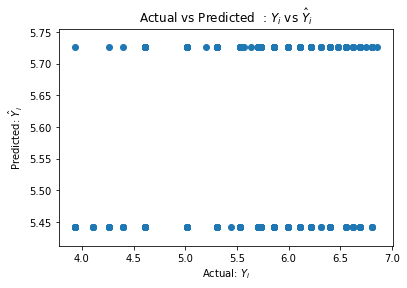

In [147]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = DT.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [148]:
print('mean cross_val_score using R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').std())
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter -1.656754503562025e+28
std deviation of cross_val_score using  R2 as parameter 3.3135090071241135e+28
mean cross_val_score using RMSE as a scoring parameter -0.33121206191385383


# Appying ensemble model for better results

# 1.GradientBoostingRegressor

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [150]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=100)
Final_r_state=max_r2_score(gbr,x,y)

The maximum r2 score  is 0.08862799387955944 at random state 71


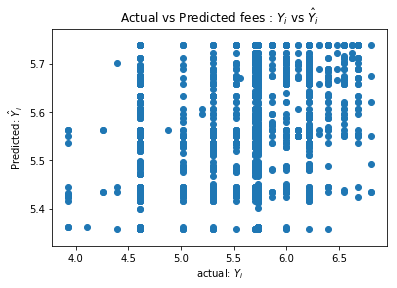

In [151]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=72)
Y_pred = gbr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted fees : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [152]:
print('mean cross_val_score using R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter -1.3524598032493707e+28
std deviation of cross_val_score using  R2 as parameter 2.7049196064987414e+28
mean cross_val_score using RMSE as a scoring parameter -0.3222610451959537


# 2.AdaBoostRegressor

In [154]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [155]:
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=10,base_estimator=lreg)
Final_r_state=max_r2_score(ad,x,y)

The maximum r2 score  is 0.05612986949848742 at random state 74


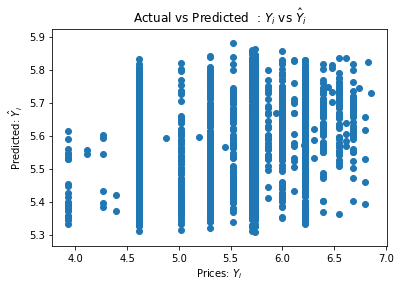

In [156]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=74)
Y_pred = ad.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [157]:
print('mean cross_val_score using R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').std())
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter -1.557248655630684e+28
std deviation of cross_val_score using  R2 as parameter 3.111510499126099e+28
mean cross_val_score using RMSE as a scoring parameter -0.33399745918710827


# 3.RandomForestRegressor

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
depth={'max_depth':range(1,30),'n_estimators':[10,100,500,1000]}
RF=RandomForestRegressor()
gs=GridSearchCV(RF,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 1, 'n_estimators': 1000}

In [58]:
rf=RandomForestRegressor(max_depth=1,n_estimators=1000)
Final_r_state=max_r2_score(rf,x,y)

The maximum r2 score  is 0.07171757530405076 at random state 65


After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that RandomForestRegressor is giving the best results which are as follows :

The maximum r2 score  is 0.07171757530405076 

Therefore RandomForestRegressor is selected as our final model

# Final Model ---RandomForestRegressor

In [61]:
rf=RandomForestRegressor(max_depth=1,n_estimators=1000)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [62]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(rf,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(rf,x,y,cv=5,scoring='r2').std())

RMSE 0.5709640352104473
r2_score 0.0719528411896233
mean cross_val_score -1.6390178626283977e+28
std deviation of cross_val_score 3.2832325753912456e+28


In [63]:
from sklearn.externals import joblib
joblib.dump(rf,"rf_Doctor's Fee.pkl")

["rf_Doctor's Fee.pkl"]

# Conclusion 

The project was about predicting the Doctor's fees based on various features features like Doctor's Qualification and number of years of experience , profile of doctors and rating given to the doctors

As the class of this dataset is real valued feature , this becomes the problem of regression .

In this project we have dropped the non essential columns, we have performed label encoding on the categorical features and also using various plots like BoxPlots , Hitogram , regression plots and line plots , we have found the outliers and  degree of the dependency of class on to the input features .


In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix we have selected RandomForestRegressor as our Final model as r2 score for this is maximum .

At last we have saved the final model using joblib.